© Philipp Weiss, philipp.weiss@physics.ox.ac.uk

In [1]:
import os   
import fnmatch
import gc

import numpy as np    
import xarray as xr  
from cartopy import crs as ccrs  
import cmocean 
import matplotlib as mpl 
from matplotlib import pyplot as plt 
from matplotlib.colors import ListedColormap

import PIL
from PIL import Image
PIL.Image.MAX_IMAGE_PIXELS = 233280000 

### define functions

In [2]:
def colorbar_axis(ax, x, y, w, h): 
 
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    axins = inset_axes(ax, width=w,height=h,
                       loc='lower left',bbox_to_anchor=(x, y, 1, 1),
                       bbox_transform=ax.transAxes,borderpad=0)
    
    return axins

In [3]:
def plot_frame(idata,ifield,ilabel,cmin,cmax,cmap,region,fregion,fsize,freso,xdelta,ydelta,ywidth,fname,fsave,fclose):

    fontcolor = 'white'
    facecolor = 'black' 
    plt.style.use('dark_background')     
        
    fig = plt.figure(figsize=(15, 10))
    axs = fig.add_subplot(projection=ccrs.PlateCarree())
            
    for idx in range(len(ifield)):

        (idata[ifield[idx]]).plot(
            ax=axs,
            transform=ccrs.PlateCarree(),
            add_colorbar=False, 
            vmin=cmin[idx],
            vmax=cmax[idx], 
            cmap=cmap[idx]
        )

        norm = mpl.colors.Normalize(vmin=cmin[idx], vmax=cmax[idx])
        cb = mpl.colorbar.ColorbarBase(ax=colorbar_axis(axs,xdelta,0 + idx*ydelta, '1.5%', ywidth), cmap=cmap[idx], norm=norm)  
        cb.set_label(ilabel[idx], color=fontcolor, fontsize=fsize) 
        cb.ax.yaxis.set_tick_params(color=fontcolor, labelsize=fsize) 
        cb.ax.yaxis.get_offset_text().set(size=fsize) 
        cb.formatter.set_powerlimits((0, 0))
        cb.outline.set_edgecolor('black') 
        plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=fontcolor) 
    
    stime = np.datetime_as_string(idata['time'], timezone='UTC')[:-11] + 'Z'
    
    fig.subplots_adjust(left=0.01, right=0.99, hspace=0, wspace=0, top=0.9, bottom=0.1)
    axs.imshow(marble.convert('1'), extent=marble_extent, transform=ccrs.PlateCarree()) 
    axs.set_title(stime, color=fontcolor, fontsize=fsize)
    axs.axis("off")
    
    if (fregion): axs.set_extent(region, crs=ccrs.PlateCarree())  
    if (fsave): plt.savefig(outdir + fname + stime + '.png', bbox_inches='tight', facecolor=facecolor, edgecolor='none', dpi=freso)
    
    if (fclose):
        fig.clear()
        plt.close(fig)

### set parameters

In [4]:
indir = '/work/bb1368/b381642/experiments/r2b9_amip_year_hamlite_feb24_post/025deg/' 
outdir = '/work/bb1368/b381642/plots/'

In [5]:
iday = 10
itime = 0

In [6]:
ifield = ['cllvi','clivi','pr'] 
icolor = ['white', 'cyan', 'red']
ilabel = [r'cloud water (kg/m$^2$)', r'cloud ice (kg/m$^2$)', r'precipitation (kg/m$^2$/s)'] 
    
nfield = len(ifield) 

In [7]:
cmap = [None]*nfield  

for idx in range(nfield):
    c_min = mpl.colors.colorConverter.to_rgba(icolor[idx],alpha = 0) 
    c_max = mpl.colors.colorConverter.to_rgba(icolor[idx],alpha = 1)
    cmap[idx] = mpl.colors.LinearSegmentedColormap.from_list('rb_cmap',[(0,c_min),(1,c_max)],1000)  

In [8]:
marble = Image.open('/work/bb1368/b381642/marble/world.topo.200409.3x21600x10800.jpeg')
marble_extent = (-180, 180, -90, 90)

In [9]:
region = [-60, 20, -15, 25]  

### read data

In [10]:
namelist = []

for file in sorted(os.listdir(indir)):
    name = os.fsdecode(file) 
    if fnmatch.fnmatch(name, '*std*'):
        namelist.append(name) 
        
print(namelist[iday])

FileNotFoundError: [Errno 2] No such file or directory: '/work/bb1368/b381642/experiments/r2b9_amip_year_hamlite_feb24_post/025deg/'

In [11]:
rdata = xr.Dataset({})
rdata = xr.open_mfdataset(indir + namelist[iday]).isel(time=itime).compute()

In [12]:
idata = xr.Dataset({})
for idx in range(nfield): 
    idata[ifield[idx]] = rdata[ifield[idx]]   

rdata.close() 
del rdata
gc.collect()

107

### plot data

In [17]:
cmin = [0]*nfield 
cmax = [0]*nfield 

for idx in range(nfield):
    cmin[idx] = idata[ifield[idx]].min()  
    cmax[idx] = idata[ifield[idx]].mean() + 3*idata[ifield[idx]].std()   

In [18]:
cmax 

[<xarray.DataArray 'cllvi' ()>
 array(0.36806976)
 Coordinates:
     time     datetime64[ns] 2020-01-30,
 <xarray.DataArray 'clivi' ()>
 array(0.08365012)
 Coordinates:
     time     datetime64[ns] 2020-01-30,
 <xarray.DataArray 'pr' ()>
 array(0.00073795)
 Coordinates:
     time     datetime64[ns] 2020-01-30]

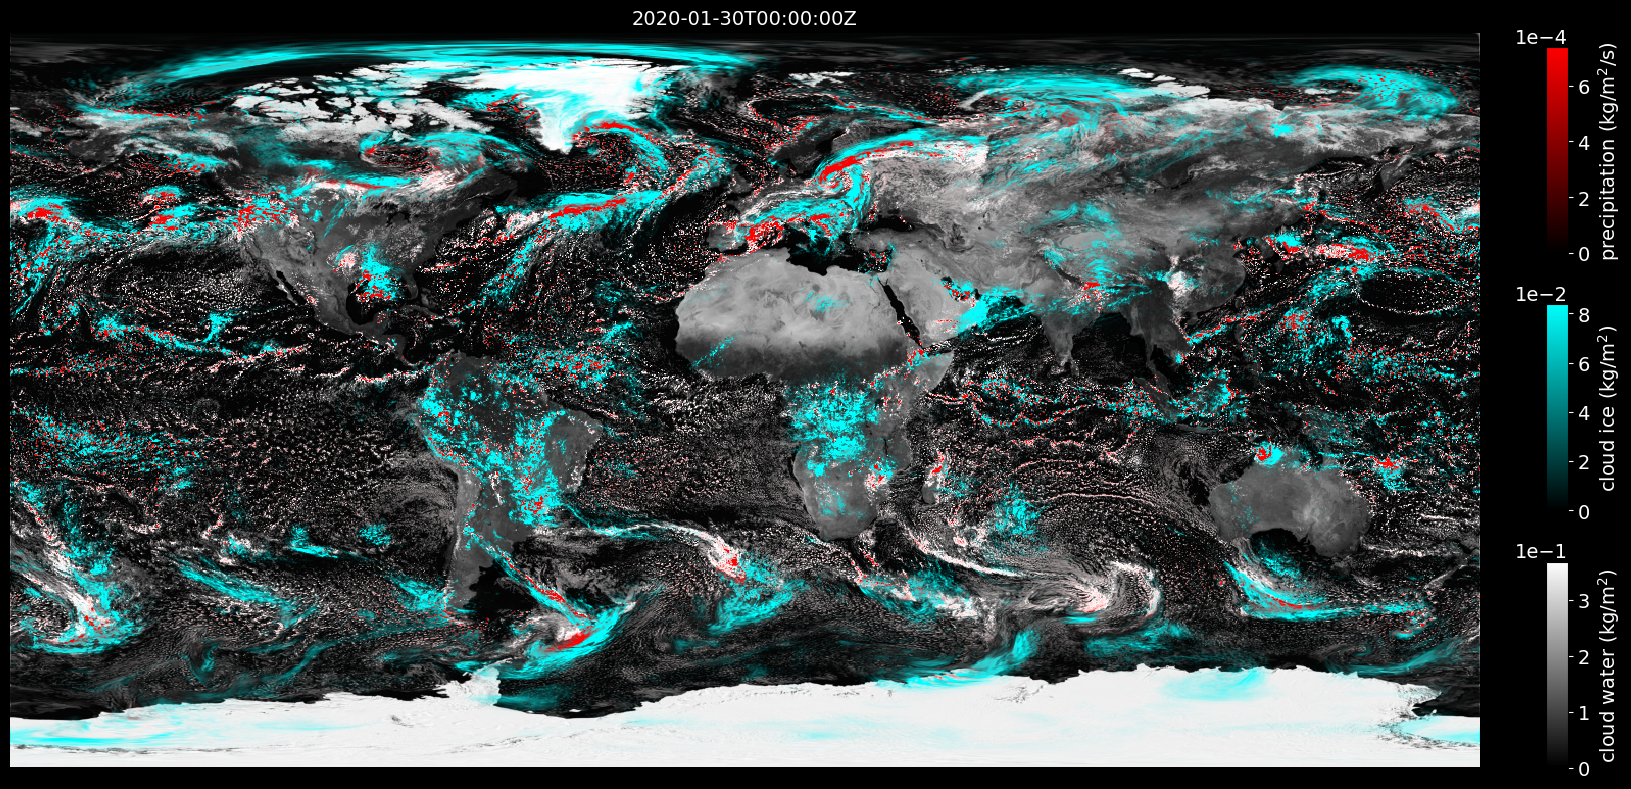

In [19]:
plot_frame(idata,ifield,ilabel,cmin,cmax,cmap,region,0,14,200,1.045,0.35,'28%','frame_cloud_',1,0) 